In [51]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [52]:
Data_benin = pd.read_csv("../data/benin-malanville.csv")
Data_sierraleone = pd.read_csv("../data/sierraleone-bumbuna.csv")
Data_togo = pd.read_csv("../data/togo-dapaong_qc.csv")

In [3]:
Data_togo.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
Data_togo.shape

(525600, 19)

In [5]:
Data_togo.dtypes

Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

In [7]:
Data_togo.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,230.555040,322.532347,-12.7,-2.2,2.1,442.400,1424.0
DNI,525600.0,151.258469,250.956962,0.0,0.0,0.0,246.400,1004.5
DHI,525600.0,116.444352,156.520714,0.0,0.0,2.5,215.700,805.7
ModA,525600.0,226.144375,317.346938,0.0,0.0,4.4,422.525,1380.0
ModB,525600.0,219.568588,307.932510,0.0,0.0,4.3,411.000,1367.0
Tamb,525600.0,27.751788,4.758023,14.9,24.2,27.2,31.100,41.4
RH,525600.0,55.013160,28.778732,3.3,26.5,59.3,80.800,99.8
WS,525600.0,2.368093,1.462668,0.0,1.4,2.2,3.200,16.1
WSgust,525600.0,3.229490,1.882565,0.0,1.9,2.9,4.400,23.1
WSstdev,525600.0,0.557740,0.268923,0.0,0.4,0.5,0.700,4.7


# Preprocessor

In [10]:
# check missing value
# threshold = len(Data_benin) * 0.5
# Data_benin = Data_benin.dropna(axis=1,thresh = threshold)
Data_sierraleone.isnull().sum()

Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64

In [11]:
#Data_togo.drop(columns=[Data_togo.columns[-1]],inplace = True)
threshold = len(Data_togo) * 0.5
Data_togo = Data_togo.dropna(axis=1,thresh = threshold)

In [43]:
print("Check missing value")
Data_togo.isnull().sum()

Check missing value


Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
YearMonth        0
dtype: int64

In [13]:
# Convert the Timestamp column to datetime format
Data_togo["Timestamp"] = pd.to_datetime(Data_togo["Timestamp"])
df_numeric = Data_togo.drop(columns=['Timestamp'])

In [14]:
# Add additional statistics if needed
summary_stats = Data_togo.describe()
summary_stats.loc['range'] = summary_stats.loc['max'] - summary_stats.loc['min']
summary_stats.loc['median'] = Data_togo.median()
summary_stats.loc['variance'] = df_numeric.var()


print(summary_stats)

                              Timestamp            GHI            DNI  \
count                            525600  525600.000000  525600.000000   
mean      2022-04-25 12:00:30.000000768     230.555040     151.258469   
min                 2021-10-25 00:01:00     -12.700000       0.000000   
25%                 2022-01-24 06:00:45      -2.200000       0.000000   
50%                 2022-04-25 12:00:30       2.100000       0.000000   
75%                 2022-07-25 18:00:15     442.400000     246.400000   
max                 2022-10-25 00:00:00    1424.000000    1004.500000   
std                                 NaN     322.532347     250.956962   
range                 364 days 23:59:00    1436.700000    1004.500000   
median              2022-04-25 12:00:30       2.100000       0.000000   
variance                            NaN  104027.114611   62979.396604   

                    DHI           ModA           ModB           Tamb  \
count     525600.000000  525600.000000  525600.0000

In [16]:
#Detect outliers
Q1 = Data_togo.quantile(0.25)
Q3 = Data_togo.quantile(0.75)
IQR = Q3 - Q1
print(type(IQR))

# Outliers are values outside the range [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
outliers = ((Data_togo < (Q1 - 1.5 * IQR)) | (Data_togo > (Q3 + 1.5 * IQR)))

print("\nOutliers Detected:\n", outliers.sum())

<class 'pandas.core.series.Series'>

Outliers Detected:
 Timestamp            0
GHI               1303
DNI              50586
DHI               7905
ModA              1237
ModB              1537
Tamb                 0
RH                   0
WS                8708
WSgust            7377
WSstdev          14669
WD                   0
WDstdev           6921
BP               19228
Cleaning           281
Precipitation     3338
TModA              137
TModB              573
dtype: int64


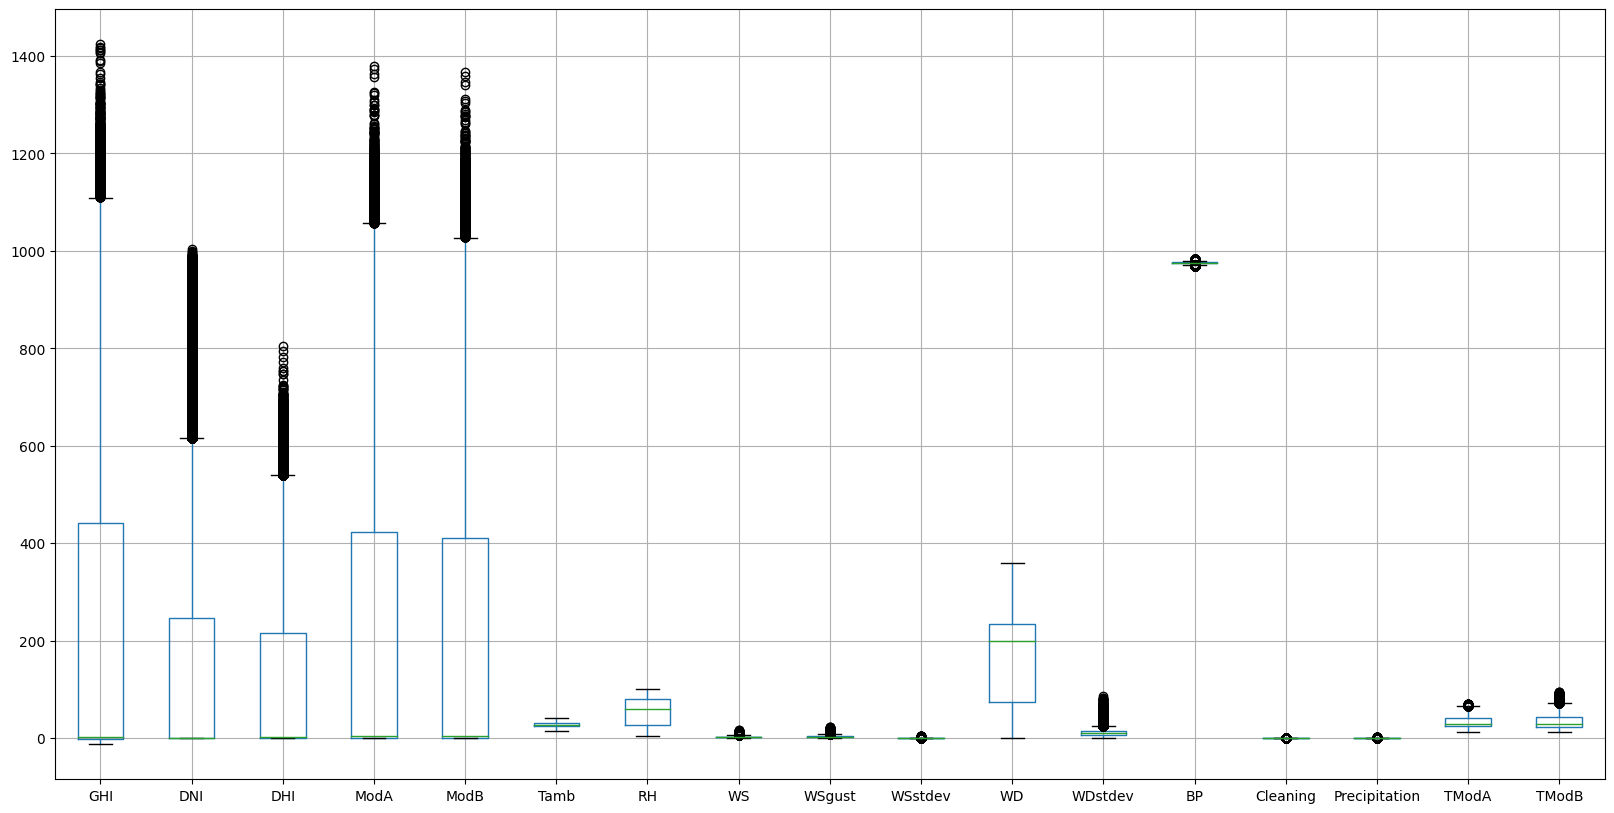

In [18]:
#Identifying Outliers with Box Plots
Data_togo.boxplot(figsize=(20, 10))
plt.show()

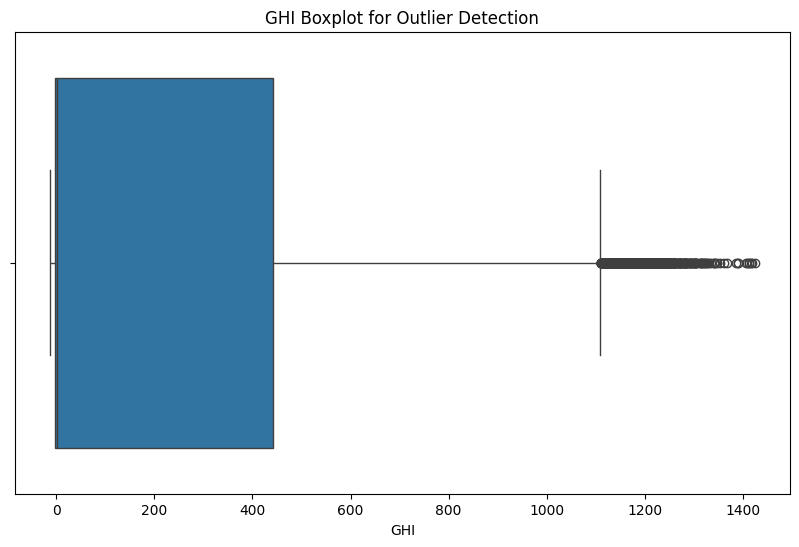

In [27]:
# Boxplot for GHI to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=Data_togo['GHI'])
plt.title('GHI Boxplot for Outlier Detection')
plt.show()

In [20]:
# Checking for negative values in GHI, DNI, DHI (should not have negatives)
incorrect_entries = (Data_togo[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0).sum()
print("\nIncorrect Entries (Negative Values):\n", incorrect_entries)
# Example of flagging suspicious entries in GHI
suspicious_entries_ghi = Data_togo[(Data_togo['GHI'] > 1400) | (Data_togo['GHI'] < 0)]  # GHI generally should be between 0 and 1400 W/m²
print("\nSuspicious GHI Entries:\n", suspicious_entries_ghi)


Incorrect Entries (Negative Values):
 GHI       257385
DNI            0
DHI            0
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64

Suspicious GHI Entries:
                  Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  \
0      2021-10-25 00:01:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.5  0.9   
1      2021-10-25 00:02:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.1   
2      2021-10-25 00:03:00 -1.3  0.0  0.0   0.0   0.0  24.8  94.4  1.2   
3      2021-10-25 00:04:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.3  1.2   
4      2021-10-25 00:05:00 -1.2  0.0  0.0   0.0   0.0  24.8  94.0  1.3   
...                    ...  ...  ...  ...   ...   ...   ...   ...  ...   
525595 2022-10-24 23:56:00 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0   
525596 2022-10-24 23:57:00 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0   
525597 2022-10-24 23:58:00 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0   
525598 2022-10-24 23:59:00 -1.1  0.0  0.0   0.0   0.0  25.4  53

In [22]:
# Checking for negative values in GHI, DNI, DHI (should not have negatives)
incorrect_entries = (Data_togo[['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']] < 0).sum()
print("\nIncorrect Entries (Negative Values):\n", incorrect_entries)


Incorrect Entries (Negative Values):
 GHI       257385
DNI            0
DHI            0
ModA           0
ModB           0
WS             0
WSgust         0
dtype: int64


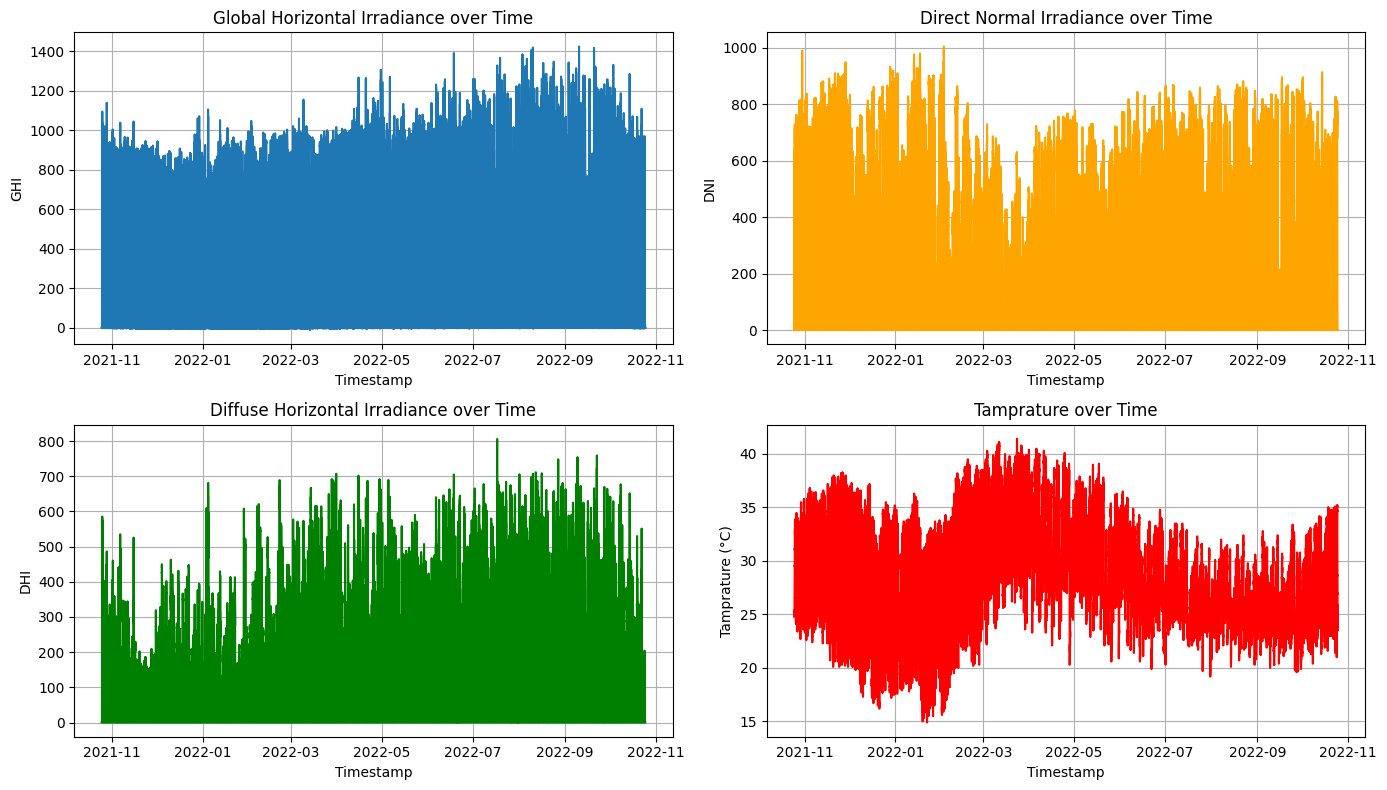

In [23]:
# Plot line graphs for GHI, DNI, DHI, and Tamb
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.plot(Data_togo['Timestamp'], Data_togo['GHI'], label='GHI')
plt.title('Global Horizontal Irradiance over Time')
plt.xlabel('Timestamp')
plt.ylabel('GHI')
plt.grid(True)

plt.subplot(2, 2, 2)
plt.plot(Data_togo['Timestamp'], Data_togo['DNI'], label='DNI', color='orange')
plt.title('Direct Normal Irradiance over Time')
plt.xlabel('Timestamp')
plt.ylabel('DNI')
plt.grid(True)

plt.subplot(2, 2, 3)
plt.plot(Data_togo['Timestamp'], Data_togo['DHI'], label='DHI', color='green')
plt.title('Diffuse Horizontal Irradiance over Time')
plt.xlabel('Timestamp')
plt.ylabel('DHI')
plt.grid(True)

plt.subplot(2, 2, 4)
plt.plot(Data_togo['Timestamp'], Data_togo['Tamb'], label='Tamb', color='red')
plt.title('Tamprature over Time')
plt.xlabel('Timestamp')
plt.ylabel('Tamprature (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()

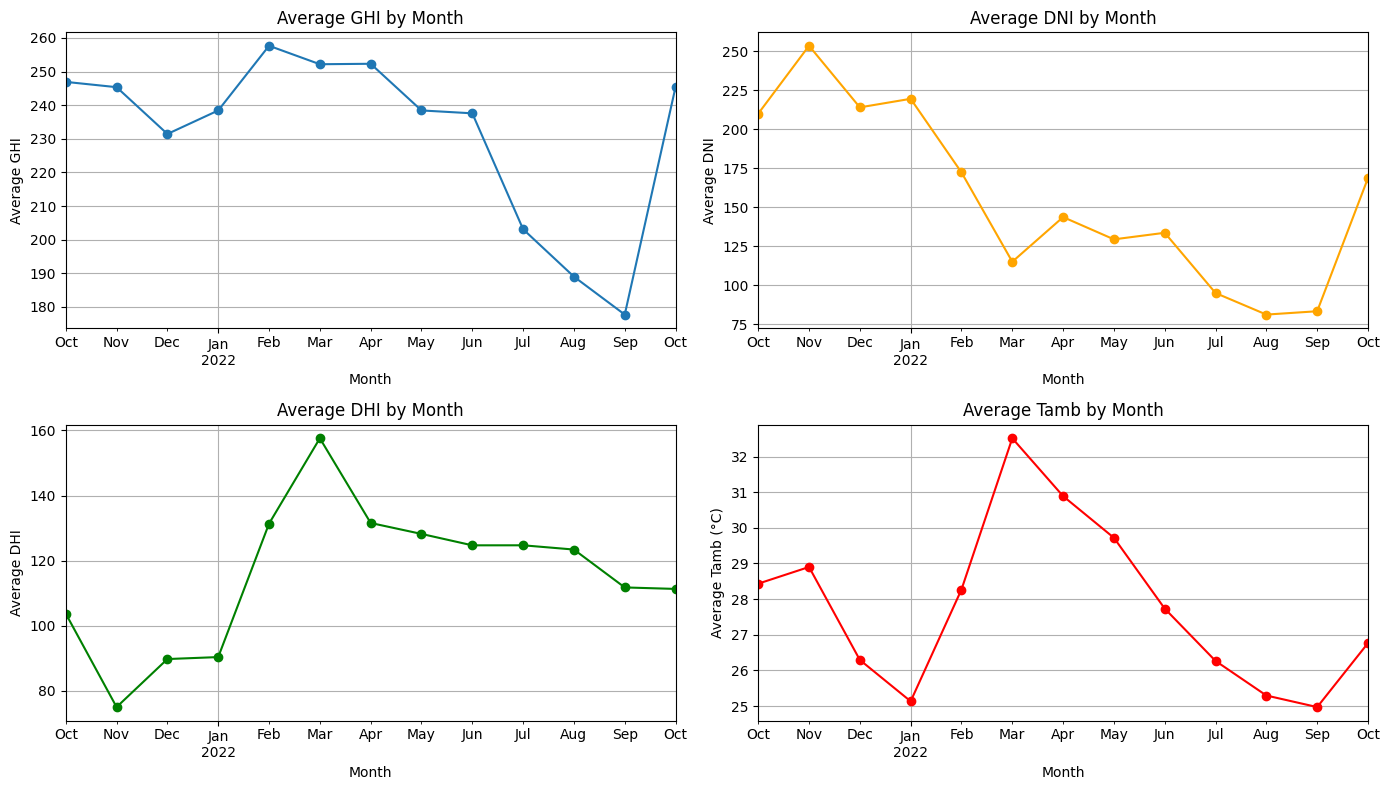

In [46]:
# Extract month and year for grouping
Data_togo['YearMonth'] = Data_togo['Timestamp'].dt.to_period('M')

# Group by YearMonth and calculate mean for each group
monthly_means = Data_togo.groupby('YearMonth').mean()

# Plot the monthly means
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
monthly_means['GHI'].plot(kind='line', marker='o')
plt.title('Average GHI by Month')
plt.xlabel('Month')
plt.ylabel('Average GHI')
plt.grid(True)

plt.subplot(2, 2, 2)
monthly_means['DNI'].plot(kind='line', marker='o', color='orange')
plt.title('Average DNI by Month')
plt.xlabel('Month')
plt.ylabel('Average DNI')
plt.grid(True)

plt.subplot(2, 2, 3)
monthly_means['DHI'].plot(kind='line', marker='o', color='green')
plt.title('Average DHI by Month')
plt.xlabel('Month')
plt.ylabel('Average DHI')
plt.grid(True)

plt.subplot(2, 2, 4)
monthly_means['Tamb'].plot(kind='line', marker='o', color='red')
plt.title('Average Tamb by Month')
plt.xlabel('Month')
plt.ylabel('Average Tamb (°C)')
plt.grid(True)

plt.tight_layout()
plt.show()

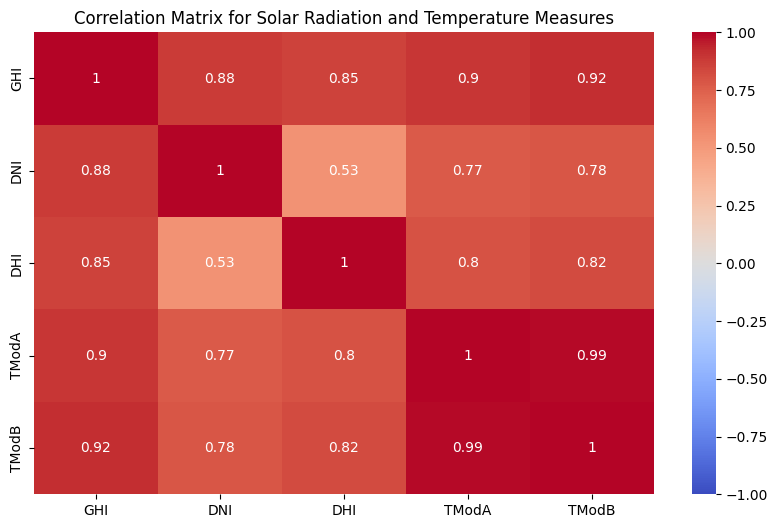

In [28]:
# Select the relevant columns for the correlation matrix
corr_columns = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB']

# Calculate the correlation matrix
corr_matrix = Data_togo[corr_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Solar Radiation and Temperature Measures')
plt.show()

In [ ]:
# Plot pair plot
sns.pairplot(Data_togo[corr_columns], kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}})
plt.suptitle('Pair Plot for Solar Radiation and Temperature Measures', y=1.02)
plt.show()

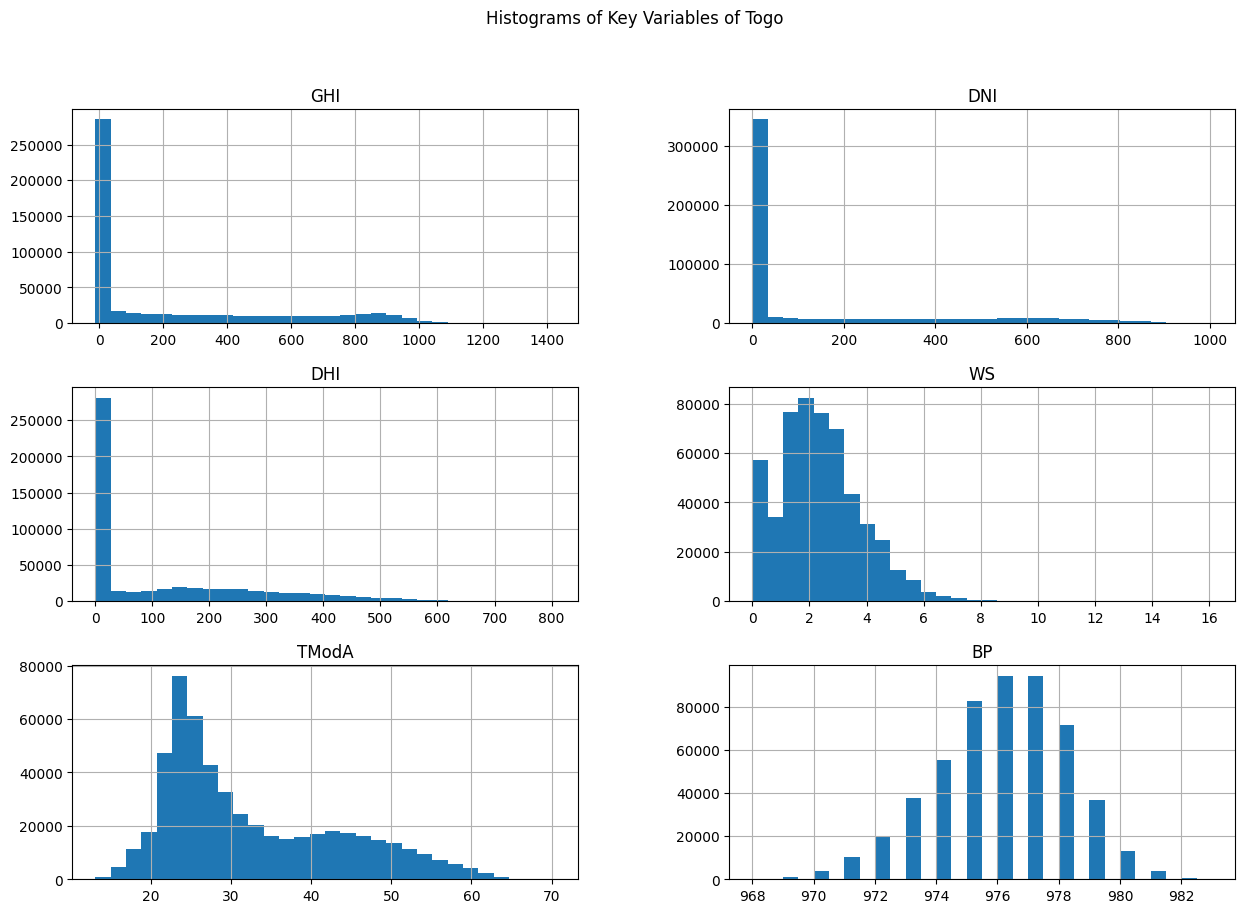

In [40]:
# Histograms for GHI, DNI, DHI, WS, TModA
variables = ['GHI', 'DNI', 'DHI', 'WS', 'TModA',"BP"]
Data_togo[variables].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Key Variables of Togo')
plt.show()

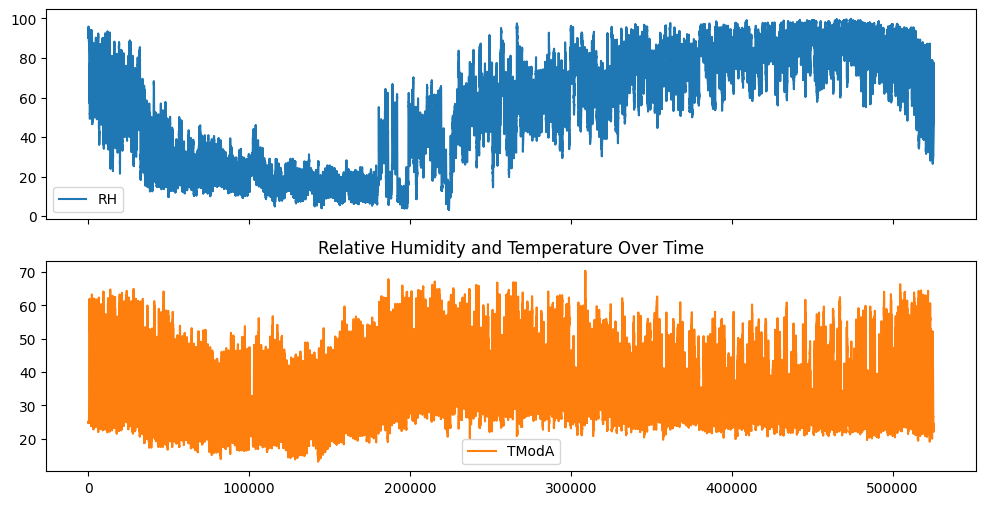

In [49]:
# Time Series: RH and Temperature over Time
Data_togo[['RH', 'TModA']].plot(subplots=True, figsize=(12, 6))
plt.title('Relative Humidity and Temperature Over Time')
plt.show()


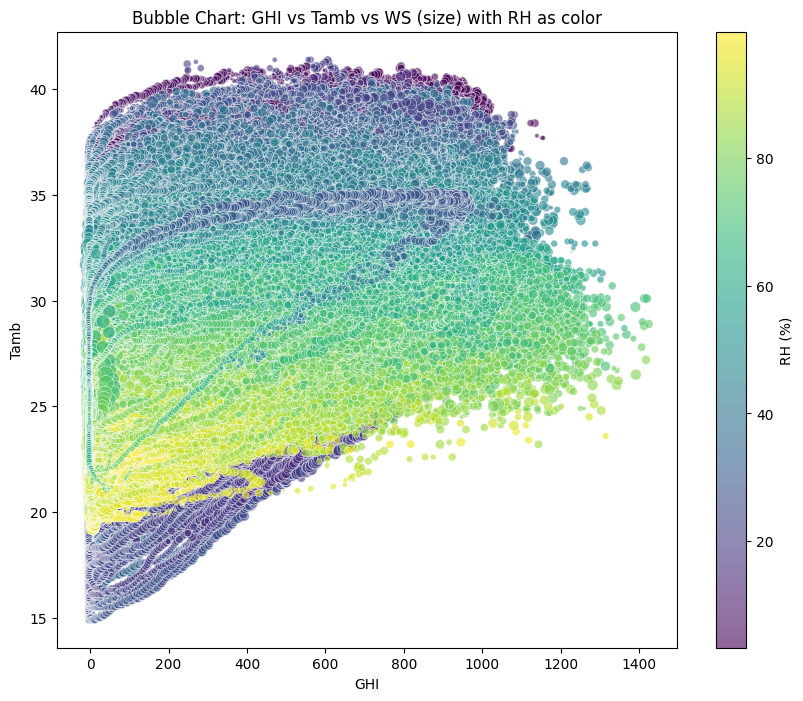

In [42]:
# Bubble chart: GHI vs Tamb vs WS (size) with RH as color
plt.figure(figsize=(10, 8))
plt.scatter(Data_togo['GHI'], Data_togo['Tamb'], s=Data_togo['WS']*10, c=Data_togo['RH'], cmap='viridis', alpha=0.6, edgecolor='w', linewidth=0.5)
plt.title('Bubble Chart: GHI vs Tamb vs WS (size) with RH as color')
plt.xlabel('GHI')
plt.ylabel('Tamb')
plt.colorbar(label='RH (%)')
plt.show()


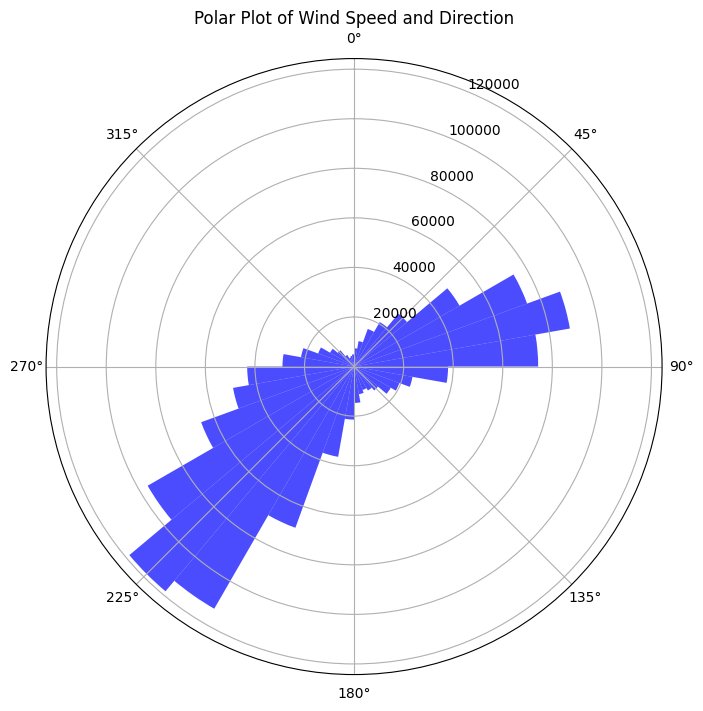

In [50]:
# Polar plot for wind direction and speed
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
ax.hist(Data_togo['WD'].dropna().apply(np.deg2rad), bins=36, weights=Data_togo['WS'].dropna(), color='blue', alpha=0.7)
ax.set_theta_direction(-1)
ax.set_theta_offset(np.pi / 2)
ax.set_title('Polar Plot of Wind Speed and Direction')
plt.show()


